# MSE Homework 7

In [1]:
from thermostate import Q_,units
import math
import numpy as np

# Problem 8.1

What is the magnitude of the maximum stress that exists at the tip of an internal crack having a radius of curvature of $1.9\times10^{-4}$ mm and a crack length of $3.8\times10^{-2}$ mm when a tensile stress of $140$ MPa is applied?

# Solution

We know that maximum stress $\sigma_m$ at the tip of a crack is:

$$\sigma_{m}=2\sigma_o\sqrt{\frac{a}{\rho_t}}$$

Where:

$\sigma_o$ is the applied stress

$2a$ is the length of the **internal** crack ($a$ is half the length)

$\rho_t$ is the radius of curvature at the tip of the crack

In [2]:
sigma_o = Q_(140, "MPa")
a = Q_(3.8e-2, "mm")/2
rho_t = Q_(1.9e-4, "mm")

sigma_m = 2*sigma_o*np.sqrt(a/rho_t)
print(sigma_m.to("GPa").round(2))

2.8 gigapascal


<div class="alert alert-success">

$\sigma_o=2.8$ GPa 

</div>

#  Problem 8.2

Estimate the theoretical fracture strength of a brittle material if it is known that fracture occurs by the propagation of an elliptically shaped surface crack of length $0.5$ mm and a tip radius of curvature of $5\times10^{-3}$ mm, what a stress of of $1035$ MPa is applied.

# Solution

Same equations as above:

$$\sigma_{m}=2\sigma_o\sqrt{\frac{a}{\rho_t}}$$

Where:

$\sigma_o$ is the applied stress

$a$ is the length of the **surface** crack *Refer to the image below on difference between surface crack and internal crack

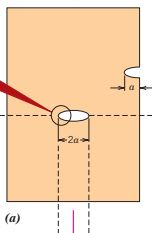

$\rho_t$ is the radius of curvature at the tip of the crack

In [3]:
sigma_o = Q_(1035, "MPa")
a = Q_(0.5, "mm")
rho_t = Q_(5e-3, "mm")

sigma_m = 2*sigma_o*np.sqrt(a/rho_t)
print(sigma_m.to("GPa").round(2))

20.7 gigapascal


<div class="alert alert-success">

$\sigma_o=20.7$ GPa 

</div>

# Problem 8.3

If the specific surface energy for aluminum oxide is $0.90$ J/m$^2$, then using data from Table 12.5, compute the critical stress required for the propagatoin of an internal crack of length $0.40$ mm.

# Solution

The stress required to length a crack $\sigma_c$ is given by:

$$\sigma_c=\sqrt{\frac{2E\gamma_s}{\pi a}}$$

Where:

$E$ is the modulus of elasticity

$\gamma_s$ is the specific surface energy

$a$ is half the length of the **internal** crack

In [4]:
E = Q_(393, "GPa")
gamma_s = Q_(0.9, "J/m^2")
a = Q_(0.4, "mm")/2

sigma_c = np.sqrt((2*E*gamma_s)/(np.pi*a))
print(sigma_c.to("MPa").round(2))

33.55 megapascal


<div class="alert alert-success">

$\sigma_c=33.55$ MPa 

</div>

# Problem 8.5

A specimen of a 4340 steel alloy with a plane strain fracture toughness of $54.8$ MPa$\cdot$m$^\frac{1}{2}$ is exposed to a stress of $1030$ MPa. Will the specimen experience fracture if the largest surface crack is $0.5$ mm? Why or why not? Assume that the parameter $Y$ has a value of $1.0$.

# Solution

We know that the plane strain fracture toughness $K_{IC}$ is defined by:

$$K_{IC}=Y\sigma_c\sqrt{\pi a}$$

Rearranging to find $\sigma_c$ yields:

$$\sigma_c = \frac{K_{IC}}{Y\sqrt{\pi a}}$$

Where:

$K_{IC}$ is fracture toughness

$a$ is the **surface** crack length

In [5]:
K_IC = Q_(54.8, "MPa*m^0.5")
a = Q_(0.5, "mm")
Y = 1

sigma_c = K_IC/(Y*np.sqrt(np.pi*a))
print(sigma_c.to("MPa").round(2))

1382.68 megapascal


<div class="alert alert-success">

Since the critical stress is higher than the applied stress, we will not see a fracture

</div>

# Problem 8.13

The following tabulated data were gathered from a series of Charpy impact tests on tempered 4340 steel alloy.

|Temperature $(^oC)$|Impact Energy $(J)$|
|-------------------|-------------------|
|$$0$$              |$$105$$            |
|$$-25$$            |$$104$$            |
|$$-50$$            |$$103$$            |
|$$-75$$            |$$97$$             |
|$$-100$$           |$$63$$             |
|$$-113$$           |$$40$$             |
|$$-125$$           |$$34$$             |
|$$-150$$           |$$28$$             |
|$$-175$$           |$$25$$             |
|$$-200$$           |$$24$$             |

(a) Plot the data as impact energy versus temperature

(b) Determine a ductile-to-brittle transition temperature as the temperature corresponding to the average of the maximum and minimum impact energies

(c) Determine a ductile-to-brittle transition temperature as the temperature at which the impact energy is $50$ J

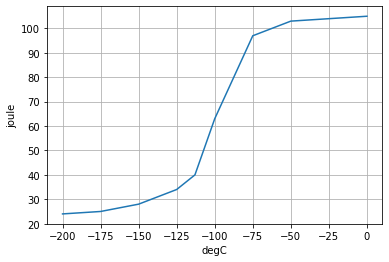

In [6]:
import matplotlib.pyplot as plt

T_list = [0,-25,-50,-75,-100,-113,-125,-150,-175,-200]*units.degC
#T_list = T_list.to("K")
E_list = [105,104,103,97,63,40,34,28,25,24]*units.J
plt.plot(T_list,E_list)
plt.grid(True)
plt.show()

# part (b)

Average = $\frac{105+24}{2}$

The average energy is $64.5$ J which corrisponds to about:

<div class="alert alert-success">

T = $-100$ $^o$C

</div>

# part(c)

If we use the temperature at energy of $50$ J we get a temperature of:

<div class="alert alert-success">

T =  $-112.5$ $^o$ C

</div>

# Problem 8.22

The fatigue data for a brass alloy are given as follows:

|Stress Amplitude (MPa)|Cycles to Failure|
|-------------------|-------------------|
|$$170$$            |$$3.7\times10^4$$|
|$$148$$            |$$1.0\times10^5$$|
|$$130$$            |$$3.0\times10^5$$|
|$$114$$            |$$1.0\times10^6$$|
|$$92$$             |$$1.0\times10^7$$|
|$$80$$             |$$1.0\times10^8$$|
|$$74$$             |$$1.0\times10^9$$|

(a) Make an S-N plot (stress amplitude versus logarithm of cycles to failure) usinig this data.

(b) Determine the fatigure strength at $4\times10^6$ cycles.

(c) Determine the fatigue life for $120$ MPa

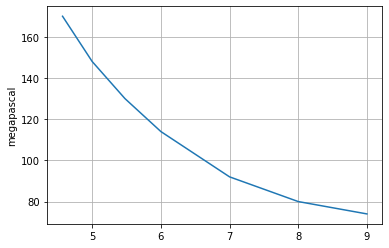

In [7]:
Stress = [170,148,130,114,92,80,74]*units.MPa
Cycles = [3.7e4,1e5,3e5,1e6,1e7,1e8,1e9]

log_cycles = np.zeros_like(Cycles)

for i, C_i in enumerate(Cycles):
    log_cycles[i] = np.log10(C_i)

plt.plot(log_cycles,Stress)
plt.grid(True)
plt.show()

# Part (b)

$log(4\times 10^6)=6.60$

At this location, the max stress is about 

<div class="alert alert-success">

$100$ MPa

</div>

# Part (C)

At $120$ MPa, it is approximatly $log(5.75)$

<div class="alert alert-success">

$5.62\times10^5$ Cycles

</div>

# Problem 8.29

List four measures that may be taken to increase the resistance to fatigue of a metal alloy.

# Solution

* Polish component surface (Fixes hairline fractures)

* Avoid sharp corners (Lowers stress concentration K)

* Surface layer under compression (Tensile strength is offset by the constant preconcentration)

* Place surface layer under compression by shot peening (Curved indentations form a layer under compression) or Surface carburizing/nitriding

# Problem 8.37

A cylindrical component constructed from an S-590 alloy (Figure 8.31) has a diameter of $14.5$ mm ($0.57$ in). Determine the maximum load that may be applied for it to survive $10$ hours at $925$ $^o$C

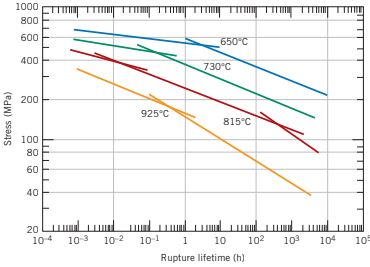

# Solution

$10$ hours at $925$ $^o$C has a stress $100$ MPa as seen in the image above.

We know:

$$\sigma = \frac{F}{A}$$

Plugging in values gives our applied force of:

In [8]:
d = Q_(14.5,"mm")
r = d/2
A = np.pi*r**2
sigma = Q_(100, "MPa")
F = A*sigma
print(F.to("kN").round(2))

16.51 kilonewton


<div class="alert alert-success">

$F=16.51$ kN

</div>

# Problem 8.43

Steady-state creep data taken for an iron at a stress level of 140 MPa (20,000 psi) are given here:

|$$\dot\epsilon_s(h^{-1})$$|$$T(K)$$|
|--------------------|--------|
|$$6.6\times10^{-4}$$|$$1090$$|
|$$8.8\times10^{-2}$$|$$1200$$|

If it is known that the value of the stress exponent $n$ for this allow is 8.5, compute the steady-state creep rate at $1300$ K and a stress level of $83$ MPa.

# Solution

We know the governing equation here is 

$$\dot\epsilon_s = K_2\sigma^nexp\left(\frac{-Q_c}{RT}\right)$$

And we can use the data from the table to find $K_2$ and $Q_c$:

$$ln(\dot\epsilon_s)=ln(K_2)+nln(\sigma)+\left(\frac{-Q_c}{RT}\right)$$

Our linear system of equation wil be:

$$ln(K_2)-\frac{1}{RT_1}Q_c = ln(\dot\epsilon_{s1})-nln(\sigma)$$

$$ln(K_2)-\frac{1}{RT_2}Q_c = ln(\dot\epsilon_{s2})-nln(\sigma)$$

In [9]:
strain_rate_1 = 6.6e-4
strain_rate_2 = 8.8e-2
T_1 = 1090
T_2 = 1200

sigma = 140
n = 8.5

R = 8.31

A = np.array([[1,-1/(R*T_1)],
              [1,-1/(R*T_2)]])
B = np.array([[np.log(strain_rate_1)-n*np.log(sigma)],
              [np.log(strain_rate_2)-n*np.log(sigma)]])

X = np.linalg.inv(A).dot(B)
X[0] = np.exp(X[0])
print(X)
K_2 = X[0]
Q_c = X[1]

[[5.73595171e+01]
 [4.83479634e+05]]


$K_2=57.36$ h$^{-1}$ and $Q_c = 483,470$ J/mol

Now we use our first equation to find $\dot\epsilon_s$:



In [10]:
sigma_3 = 83
T_3 = 1300
strain_rate_3 =K_2*sigma_3**n*np.exp(-Q_c/(R*T_3))
print(strain_rate_3)

[0.04307911]


<div class="alert alert-success">

$\dot\epsilon_s=4.31\times10^{-2}$ h$^{-1}$

</div>